DATASET USED : Classification of Malware with PE headers (From kaggle)


Importing the Dataset

In [ ]:
from google.colab import drive
import pandas as pd


drive.mount('/content/drive')

dataset = pd.read_csv(r"/content/drive/MyDrive/CSA-Sem 6/PE/Integrated.csv",skip_blank_lines=False)
print('Total Shape :',dataset.shape)
dataset.head()

Mounted at /content/drive
Total Shape : (5212, 70)


,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,...,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,filesize,E_file,fileinfo,class
0,144.0,3.0,4.0,65535.0,184.0,256.0,4.0,1.0,0.0,1.0,...,1.0,3.0,0.0,NoPacker,6.603616,5.443362,1181520.0,6.627552,1.0,0.0
1,144.0,3.0,4.0,65535.0,184.0,184.0,4.0,1.0,0.0,1.0,...,1.0,3.0,0.0,NoPacker,5.205926,2.123522,7680.0,5.318221,0.0,0.0
2,144.0,3.0,4.0,65535.0,184.0,272.0,5.0,1.0,0.0,1.0,...,1.0,4.0,0.0,NoPacker,6.238000,3.380859,57872.0,6.507758,1.0,0.0
3,144.0,3.0,4.0,65535.0,184.0,184.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,NoPacker,0.000000,0.000000,95616.0,4.575092,1.0,0.0
4,144.0,3.0,4.0,65535.0,184.0,224.0,5.0,1.0,0.0,1.0,...,1.0,4.0,0.0,NoPacker,6.355626,0.702621,48128.0,5.545531,1.0,0.0


  HANDLING MISSING VALUES

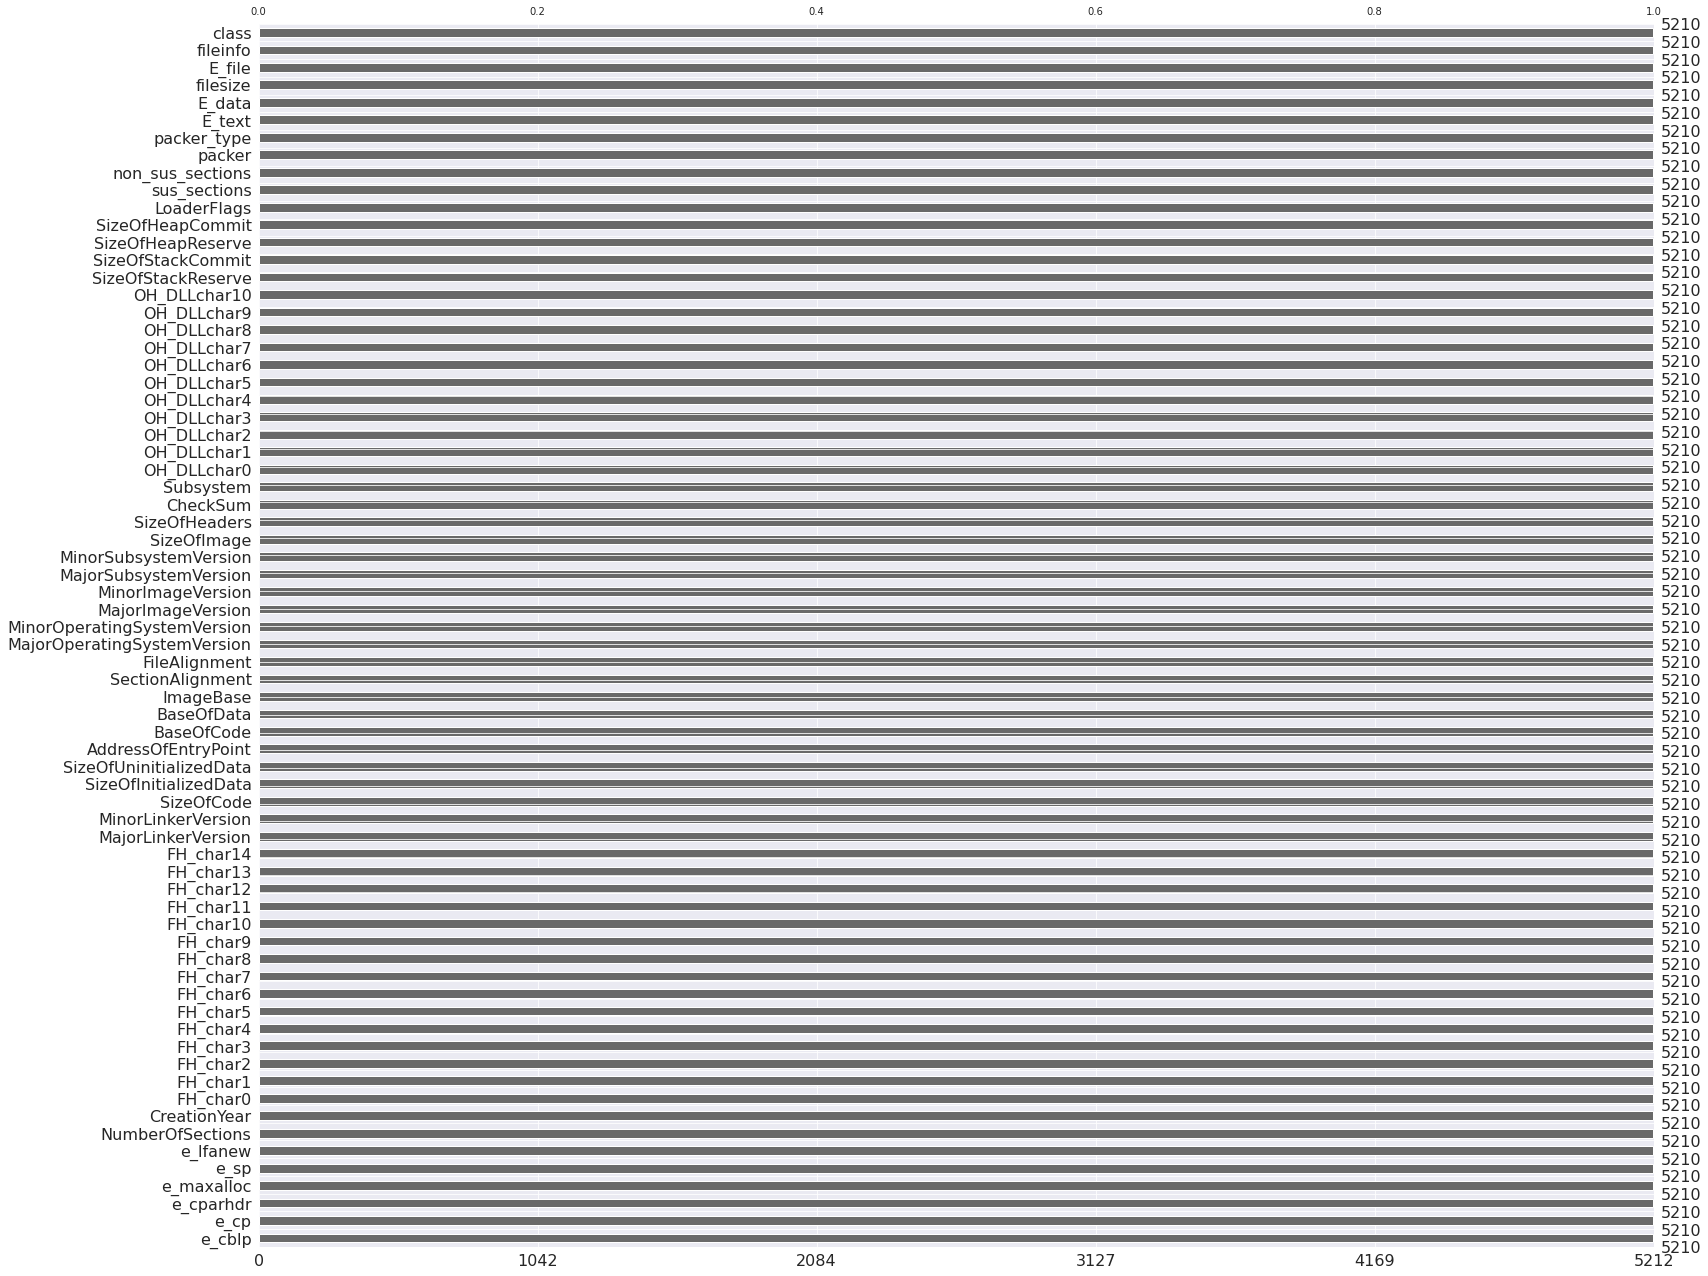

In [ ]:
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

dataset.isnull().sum()
msno.bar(dataset)

Using interpolate method to handle missing values.

In [ ]:
df = dataset.interpolate()

df.isnull().sum()

e_cblp        0
e_cp          0
e_cparhdr     0
e_maxalloc    0
e_sp          0
             ..
E_data        0
filesize      0
E_file        0
fileinfo      0
class         0
Length: 70, dtype: int64

Dropping the NA rows

In [ ]:
dataset = dataset.dropna()
dataset.shape

(5210, 78)

One-hot encoding on the categorical column

In [ ]:
type_df = pd.DataFrame(dataset.dtypes).reset_index()
type_df.columns=['cols','type']
type_df[type_df['type']=='object']['cols'].unique()

print('Total unique values in "packer_type":',dataset['packer_type'].nunique())

#Extracting the required levels only, based on value counts.
packer_unique_df = pd.DataFrame(dataset['packer_type'].value_counts()).reset_index()
packer_unique_df.columns = ['packer_type','unique_count']
catg = packer_unique_df[packer_unique_df['unique_count']>10]['packer_type'].unique()

encoded = pd.get_dummies(dataset['packer_type'])
encoded = encoded[[col for col in list(encoded.columns) if col in catg]]
print('Shape of encode :',encoded.shape)

#Concatenating the encoded columns
if set(catg).issubset(set(dataset.columns))==False: #Conditional automation
    dataset = pd.concat([dataset,encoded],axis=1)
    dataset.drop(columns='packer_type',inplace=True)

dataset.shape

Total unique values in "packer_type": 40
Shape of encode : (5212, 9)


(5212, 78)

Scaling our dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

target='class'
cols_to_keep = [cols for cols in list(dataset.columns) if target not in cols]
dataset_modified = dataset[cols_to_keep]
ads_arr_y = np.array(dataset[target])

ads_arr_scaled = StandardScaler().fit_transform(dataset_modified)
print(ads_arr_scaled.shape)
ads_arr_scaled[0]

(5210, 77)


array([-0.01404635, -0.01943837, -0.01948361,  0.07939496, -0.01913298,
        0.68263322, -0.34480506,  0.0984374 , -0.75450455,  0.        ,
       -0.94799159, -0.9483566 , -0.01385552, -0.1461792 , -0.25453179,
        0.05373446, -0.13701094, -0.10329208, -0.10329208,  0.        ,
        1.61108136,  0.        , -0.25453179,  0.05353879, -0.50381603,
       -0.00738157, -0.02090132, -0.02567289,  0.94125303, -0.05004687,
        0.81832782, -2.56372277,  0.        ,  0.        , -0.61824884,
       -0.47590596, -0.06902628, -0.06346983,  0.55952963,  0.76811781,
        0.14271718,  0.06802826, -0.01323518,  1.63595415,  1.43252862,
       -0.08571613, -0.64181315, -0.01385552, -0.44587386,  0.        ,
        0.        , -0.62307524, -0.05001443, -0.01385552,  0.        ,
       -0.2042605 , -0.08413996, -0.23535331, -0.24246624,  0.03099379,
       -0.22222011, -0.26342809, -0.43062512,  0.65992463,  1.08719007,
        0.0744291 ,  0.23468632,  0.91528275, -0.17452467, -0.14

Principal Components Analysis

[Text(0, 0.5, 'explained_variance_in_ratio'),
 Text(0.5, 0, 'Principal Component'),
 Text(0.5, 1.0, 'Explained-variance vs Component Chart')]

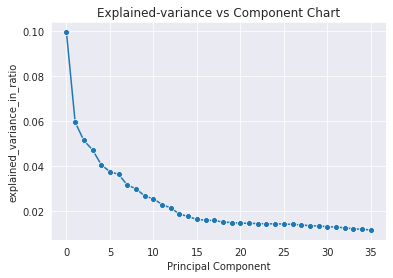

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=0.85)
principalComponents = pca.fit_transform(ads_arr_scaled)
principalComponents.shape

explained_var_ratio = pca.explained_variance_ratio_

#Plotting
sns.set_style('darkgrid')
ax = sns.lineplot(x=range(len(explained_var_ratio)),y=explained_var_ratio,marker='o')
ax.set(xlabel='Principal Component',ylabel='explained_variance_in_ratio',title='Explained-variance vs Component Chart')

Finding the total PCs to achieve 95% explained variance

In [ ]:
var_sum = 0
max_var = 0.95
for idx in range(len(explained_var_ratio)):
    var_sum += explained_var_ratio[idx]
    if var_sum>max_var:
        break

print('Total Variance explained :',100 * var_sum,'%')
print('Total PCs to achieve the above explained variance :',idx+1)

Total Variance explained : 95.15921258381546 %
Total PCs to achieve the above explained variance : 47


Visualising the components on a chart

[Text(0, 0.5, 'Principal Component - 1'),
 Text(0.5, 0, 'Principal Component - 0'),
 Text(0.5, 1.0, 'Principal_Component-0 vs Principal_Component-1')]

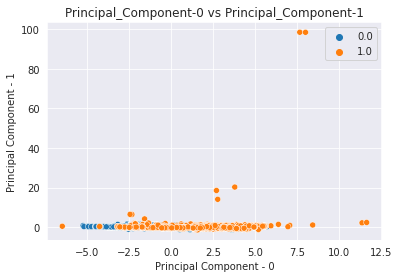

In [ ]:
ax = sns.scatterplot(x=principalComponents[:,0],y=principalComponents[:,1],hue=ads_arr_y)
ax.set(xlabel='Principal Component - 0',ylabel='Principal Component - 1',title='Principal_Component-0 vs Principal_Component-1')

APPROACHES TO CLASSIFICATION OF MALWARES

In [ ]:
df=dataset.drop(['e_cblp','e_cp','e_cparhdr','e_maxalloc','e_sp','e_lfanew'],axis=1)
df=df.drop(['NumberOfSections','CreationYear'],axis=1)
df.shape


X = df.drop(['class'],axis=1)
y = df['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)


NAIVE BAYES APPROACH

In [ ]:
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import f1_score

model = GaussianNB()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(y_pred[:15])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Calculating F1 Score

In [ ]:
from sklearn.metrics import  recall_score, accuracy_score, classification_report


accuracy = accuracy_score(y_pred, y_test)

print(accuracy)

print(classification_report(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred,zero_division=1))

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

0.5740598618572524
              precision    recall  f1-score   support

         0.0       0.53      1.00      0.69       629
         1.0       0.98      0.18      0.30       674

    accuracy                           0.57      1303
   macro avg       0.76      0.59      0.50      1303
weighted avg       0.77      0.57      0.49      1303

F1 Score:  0.3036386449184442


[[627   2]
 [553 121]]


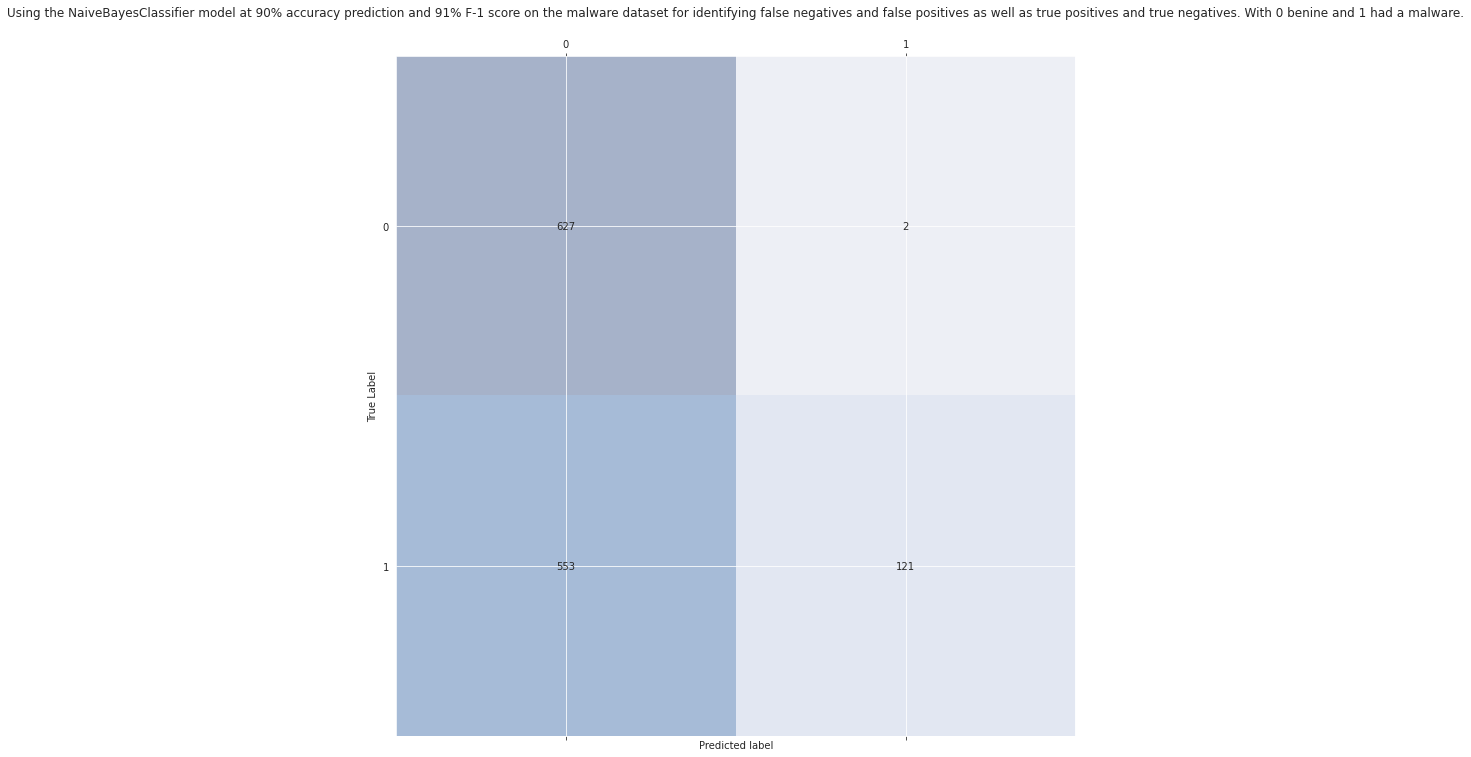

In [ ]:
print(confmat)

fig, ax =plt.subplots(figsize=(12.5, 12.5))
ax.matshow(confmat,  cmap=plt.cm.Blues, alpha=0.30)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j, y=i,
            s=confmat[i, j],
            va='center', ha='center')
    plt.title('Using the NaiveBayesClassifier model at 90% accuracy prediction and 91% F-1 score on the malware dataset for identifying false negatives and false positives as well as true positives and true negatives. With 0 benine and 1 had a malware.')
    plt.xlabel('Predicted label')
    plt.ylabel('True Label')

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver='lbfgs', max_iter=10000)
log.fit(X_train,y_train)


LogisticRegression(max_iter=10000)

In [ ]:
y_log = log.predict(X_test)

In [ ]:
c = accuracy_score(y_log, y_test)

print(c)

print(classification_report(y_test,y_log))
print('F1 Score: ',f1_score(y_test,y_log))

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_log)

NameError: ignored

SVM

In [ ]:
from sklearn import svm

from sklearn.metrics import f1_score

svm = svm.SVC()

svm.fit(X_train,y_train)

y_svm = svm.predict(X_test)

In [ ]:
d = accuracy_score(y_svm, y_test)

print(d)

print(classification_report(y_test,y_svm,zero_division=1))
print('F1 Score: ',f1_score(y_test,y_svm,zero_division=1))

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_svm)

0.6707597851112816
              precision    recall  f1-score   support

         0.0       0.63      0.78      0.70       629
         1.0       0.73      0.57      0.64       674

    accuracy                           0.67      1303
   macro avg       0.68      0.67      0.67      1303
weighted avg       0.68      0.67      0.67      1303

F1 Score:  0.6416040100250627


Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier()
tree.fit(X_train,y_train)
DecisionTreeClassifier()
y_tree= tree.predict(X_test)
f = accuracy_score(y_tree, y_test)

print(f)

print(classification_report(y_test,y_tree))
print('F1 Score: ',f1_score(y_test,y_tree))

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_tree)

0.9769762087490407
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       629
         1.0       0.98      0.98      0.98       674

    accuracy                           0.98      1303
   macro avg       0.98      0.98      0.98      1303
weighted avg       0.98      0.98      0.98      1303

F1 Score:  0.9777117384843982


KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X = dataset.loc[:,[cols for cols in dataset.columns if ('class' not in cols)]]
y = dataset.loc[:,[cols for cols in dataset.columns if 'class' in cols]]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=100)
print('Total Shape of Train X:',X_train.shape)
print('Total Shape of Train Y:',y_train.shape)
print('Total Shape of Test X:',X_test.shape)

X_arr = np.array(X_train)
X_test_arr = np.array(X_test)

y_arr = np.array(y_train).reshape(len(y_train),1)
y_test_arr = np.array(y_test).reshape(len(y_test),1)

print(X_arr.shape)
print(X_test_arr.shape)
print(y_arr.shape)



Total Shape of Train X: (3490, 77)
Total Shape of Train Y: (3490, 1)
Total Shape of Test X: (1720, 77)
(3490, 77)
(1720, 77)
(3490, 1)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_arr,y_arr)
sklearn_preds = knn.predict(X_test_arr)

score = roc_auc_score(y_test_arr, sklearn_preds)
print('1. ROC AUC: %.3f' % score)
print('2. Accuracy :',accuracy_score(y_test_arr, sklearn_preds))
print('3. Classification Report -\n',classification_report(y_test_arr, sklearn_preds))
print('4. Confusion Matrix - \n',confusion_matrix(y_test_arr, sklearn_preds))

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


1. ROC AUC: 0.973
2. Accuracy : 0.9738372093023255
3. Classification Report -
               precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       821
         1.0       0.97      0.98      0.98       899

    accuracy                           0.97      1720
   macro avg       0.97      0.97      0.97      1720
weighted avg       0.97      0.97      0.97      1720

4. Confusion Matrix - 
 [[790  31]
 [ 14 885]]


------------------------------------------------------------------------------END----------------------------------------------------------------------------------------------